In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

### About Dataset
1. **track_id:** The Spotify ID for the track
2. **artists:** The artists' names who performed the track. If there is more than one artist, they are separated by a semicolon (;)
3. **album_name:** The album name in which the track appears
4. **track_name:** Name of the track
5. **popularity:** The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based on the total number of plays the track has had and how recent those plays are. Duplicate tracks are rated independently. Artist and album popularity is derived mathematically from track popularity.
6. **duration_ms:** The track length in milliseconds
7. **explicit:** Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)
8. **danceability:** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable, and 1.0 is most danceable.
9. **energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.
10. **key:** The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
11. **loudness:** The overall loudness of a track in decibels (dB)
12. **mode:** Mode indicates the modality (major or minor) of a track, represented by 1 for major and 0 for minor.
13. **speechiness:** Speechiness detects the presence of spoken words in a track. Values above 0.66 describe tracks that are probably made entirely of spoken words.
14. **acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
15. **instrumentalness:** Predicts whether a track contains no vocals. The closer the value is to 1.0, the greater likelihood the track contains no vocal content.
16. **liveness:** Detects the presence of an audience in the recording. Higher values represent an increased probability that the track was performed live.
17. **valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive, while tracks with low valence sound more negative.
18. **tempo:** The overall estimated tempo of a track in beats per minute (BPM).
19. **time_signature:** An estimated time signature ranging from 3 to 7 indicating time signatures of 3/4 to 7/4.
20. **track_genre:** The genre in which the track belongs

In [2]:
dataset = pd.read_csv('data/dataset.csv')
dataset.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
dataset.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [4]:
dataset[dataset.isnull().any(axis=1)]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [5]:
dataset = dataset.dropna()

In [6]:
dataset.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [7]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,113999.0,56999.421925,32909.243463,0.000,28499.5000,56999.000000,85499.5000,113999.000
popularity,113999.0,33.238827,22.304959,0.000,17.0000,35.000000,50.0000,100.000
duration_ms,113999.0,228031.153387,107296.057716,8586.000,174066.0000,212906.000000,261506.0000,5237295.000
danceability,113999.0,0.566801,0.173543,0.000,0.4560,0.580000,0.6950,0.985
energy,113999.0,0.641383,0.251530,0.000,0.4720,0.685000,0.8540,1.000
key,113999.0,5.309126,3.559999,0.000,2.0000,5.000000,8.0000,11.000
loudness,113999.0,-8.258950,5.029357,-49.531,-10.0130,-7.004000,-5.0030,4.532
mode,113999.0,0.637558,0.480708,0.000,0.0000,1.000000,1.0000,1.000
speechiness,113999.0,0.084652,0.105733,0.000,0.0359,0.048900,0.0845,0.965
acousticness,113999.0,0.314907,0.332522,0.000,0.0169,0.169000,0.5975,0.996


In [8]:
dataset = dataset.drop_duplicates()

### TODO:
- Scatter plots with each other
- Heatmap
- Feature Engineering
- Standardization
- Train Model and Evaluate

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        113999 non-null  int64  
 1   track_id          113999 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        113999 non-null  int64  
 6   duration_ms       113999 non-null  int64  
 7   explicit          113999 non-null  bool   
 8   danceability      113999 non-null  float64
 9   energy            113999 non-null  float64
 10  key               113999 non-null  int64  
 11  loudness          113999 non-null  float64
 12  mode              113999 non-null  int64  
 13  speechiness       113999 non-null  float64
 14  acousticness      113999 non-null  float64
 15  instrumentalness  113999 non-null  float64
 16  liveness          113999 

In [10]:
dataset['explicit'] = dataset['explicit'].map({False:0,True:1},)

In [11]:
dataset['explicit'].value_counts()

explicit
0    104252
1      9747
Name: count, dtype: int64

In [12]:
print('Total Unique Artists:',len(dataset['artists'].unique()))
print('Total Unique Albums:',len(dataset['album_name'].unique()))
print('Total Unique Genres:',len(dataset['track_genre'].unique()))

Total Unique Artists: 31437
Total Unique Albums: 46589
Total Unique Genres: 114


In [13]:
dataset.drop(labels=['artists','album_name','track_id','Unnamed: 0','track_name'],axis=1,inplace=True)
# Although Artist plays a very important role in the song's popularity, but considering that feature would cost too much computation.

In [14]:
from sklearn.preprocessing import OneHotEncoder

# One-Hot Encoding artist-names
encoder = OneHotEncoder(drop='first', sparse_output=True)
genre_encoded = encoder.fit_transform(dataset[['track_genre']])
genre_columns = encoder.get_feature_names_out(['track_genre'])

In [15]:
# Dataset with Track_Genre as Object dtype 
old_dataset = dataset
dataset_without_genres = dataset.drop(columns=['track_genre'],axis = 1)
# Convert the sparse matrix to a dense array
genre_encoded_dense = genre_encoded.toarray()
# Concatenate the dense array to the dataset
genres_data = pd.DataFrame(genre_encoded_dense, columns=genre_columns)

dataset = pd.concat([dataset,genres_data], axis=1)

In [16]:
dataset.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
0,73.0,230666.0,0.0,0.676,0.4610,1.0,-6.746,0.0,0.1430,0.0322,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,55.0,149610.0,0.0,0.420,0.1660,1.0,-17.235,1.0,0.0763,0.9240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,57.0,210826.0,0.0,0.438,0.3590,0.0,-9.734,1.0,0.0557,0.2100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,71.0,201933.0,0.0,0.266,0.0596,0.0,-18.515,1.0,0.0363,0.9050,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,82.0,198853.0,0.0,0.618,0.4430,2.0,-9.681,1.0,0.0526,0.4690,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
num_cols = dataset_without_genres.select_dtypes(exclude=object)

<Axes: >

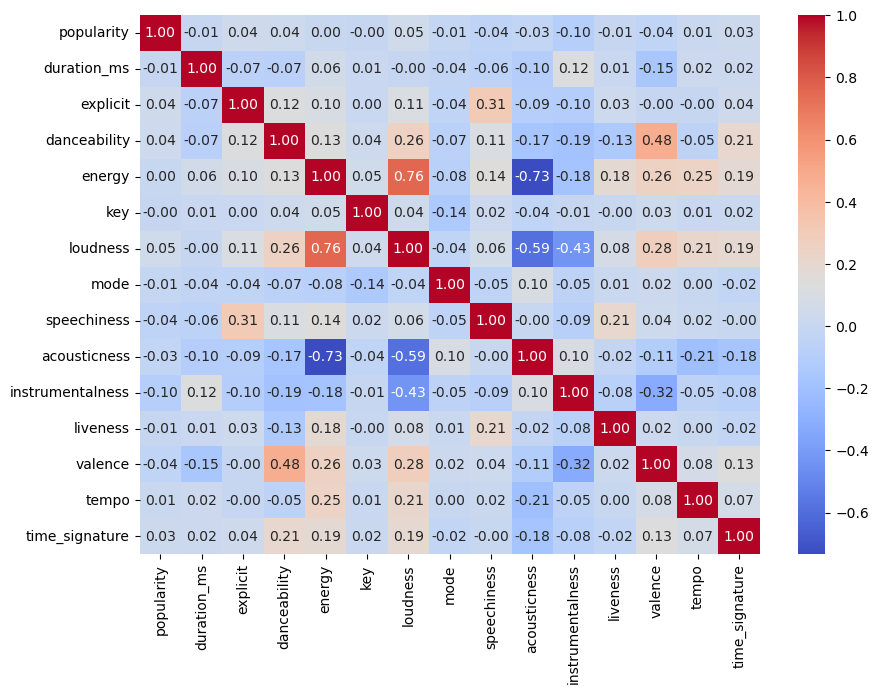

In [18]:
plt.figure(figsize=(10,7))
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')

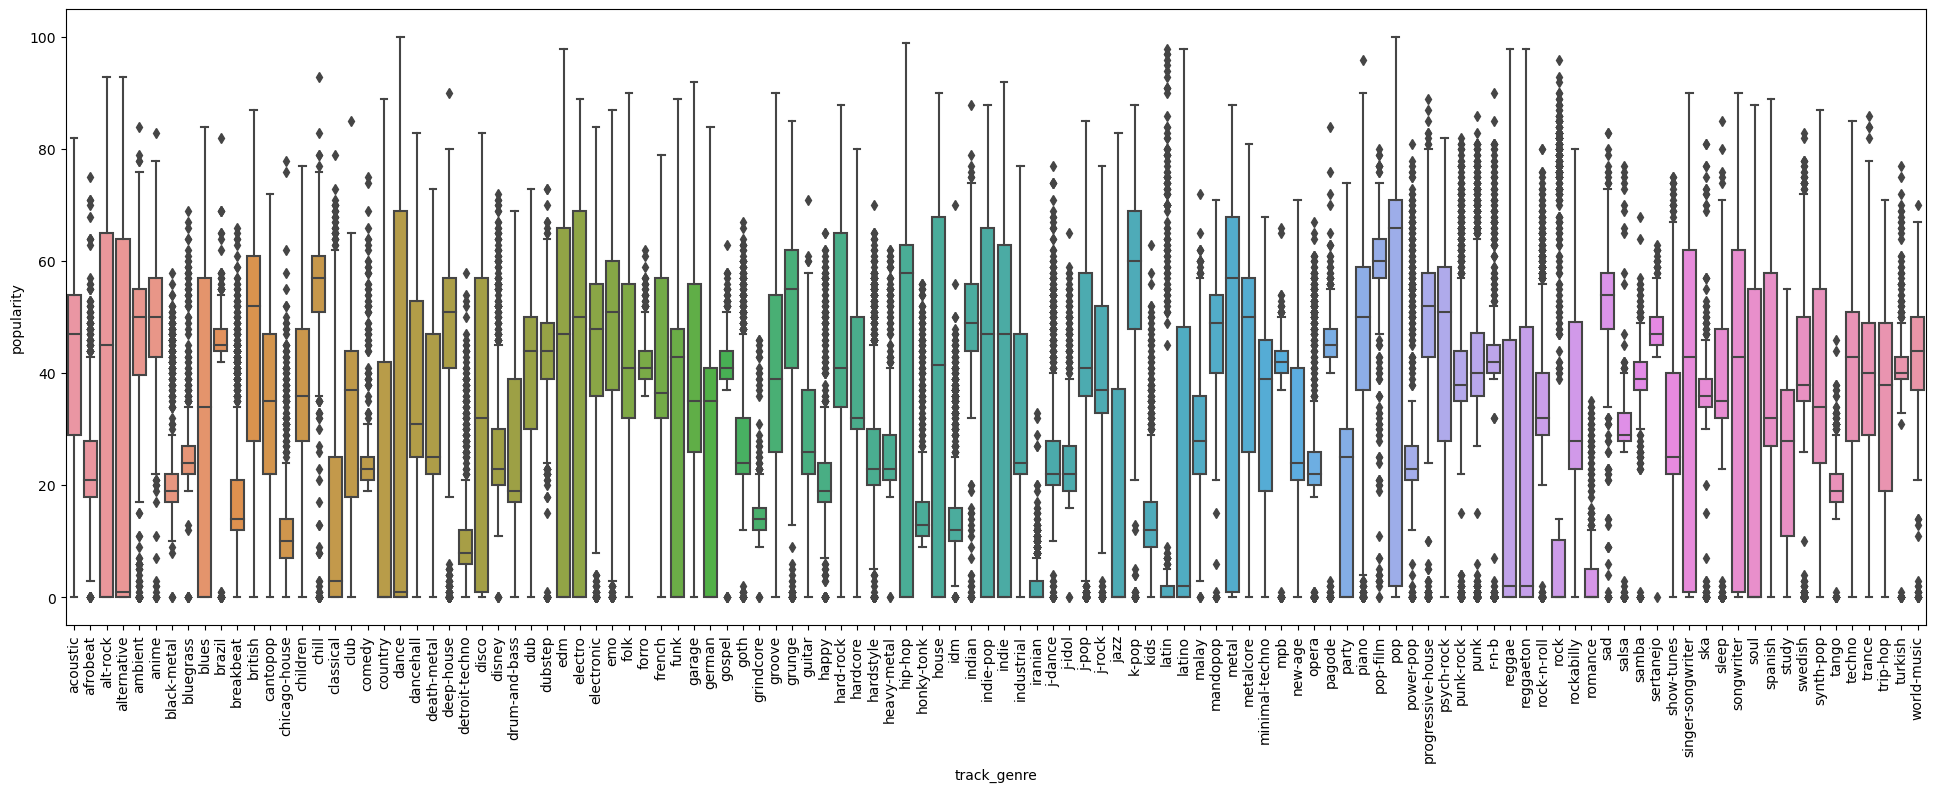

In [19]:
plt.figure(figsize=(24, 8))
sns.boxplot(x='track_genre', y='popularity', data=old_dataset)
plt.xticks(rotation=90) 
plt.show()

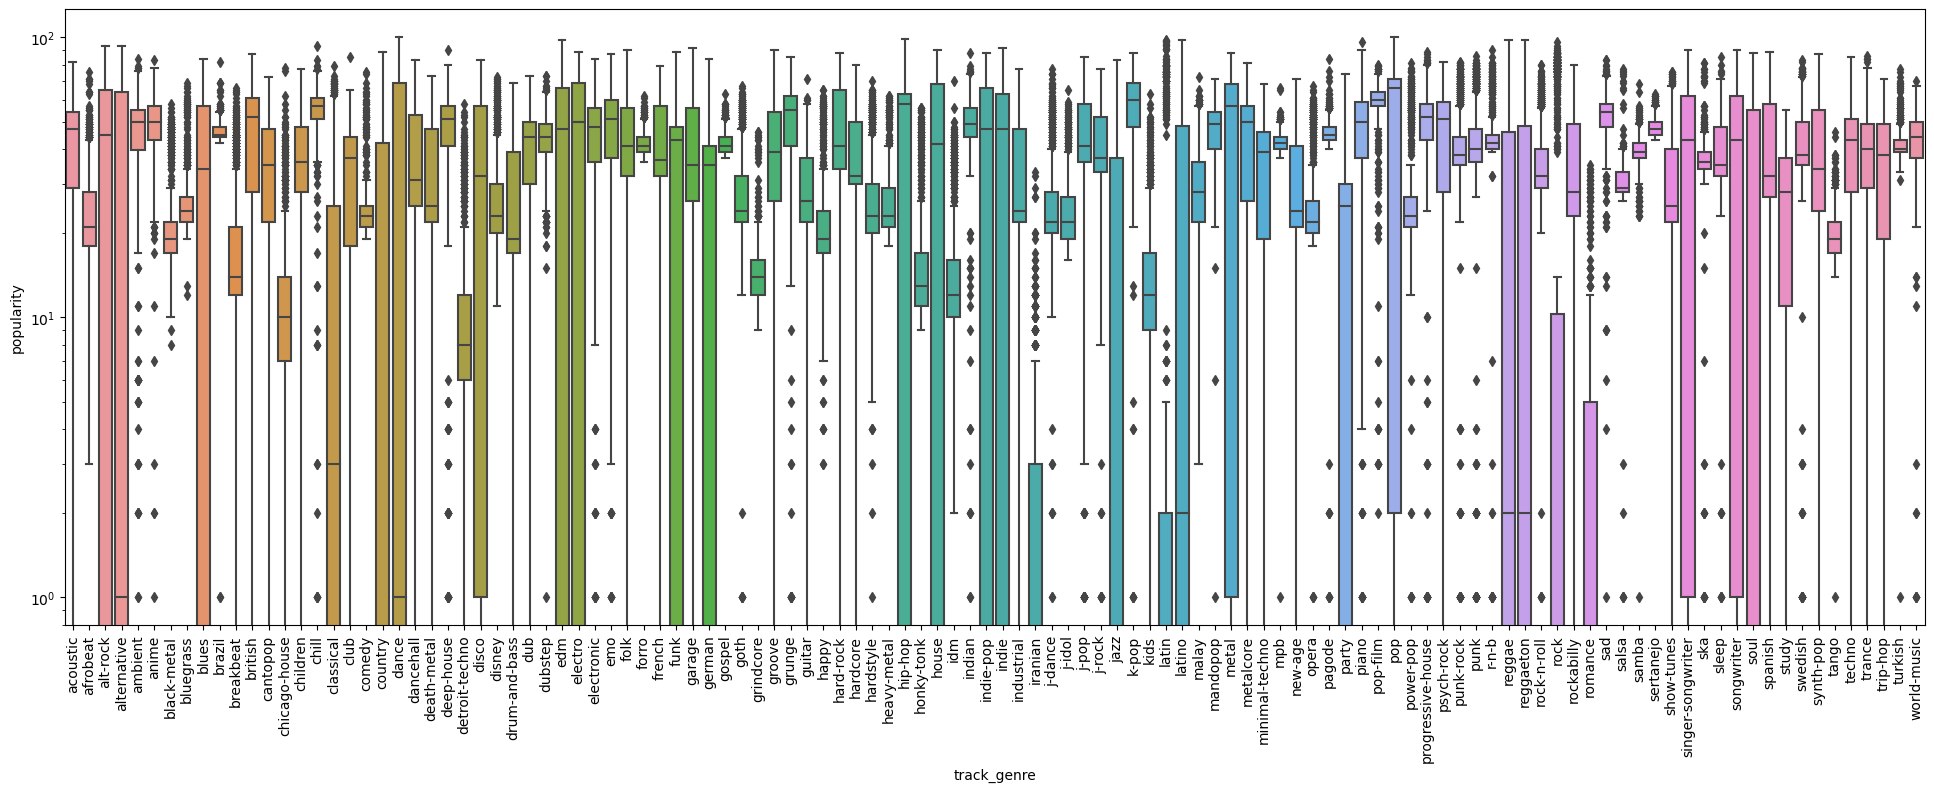

In [20]:
plt.figure(figsize=(24, 8))
plt.yscale('log')
sns.boxplot(x='track_genre', y='popularity', data=old_dataset)
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Distribution of Popularity')

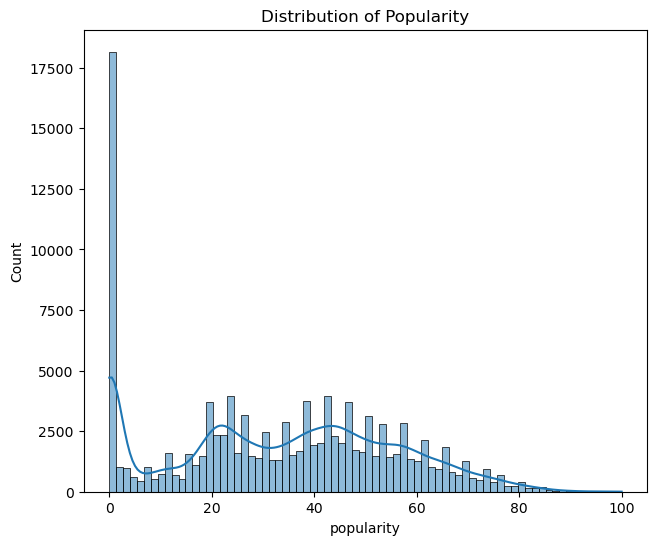

In [21]:
# Distribution plot before and after outlier removal
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.histplot(old_dataset['popularity'], kde=True)
plt.title('Distribution of Popularity')

In [24]:
scatter_features = ['loudness','explicit','danceability','time_signature','instrumentalness','speechiness','valence','acousticness', 'popularity']

In [25]:
num_cols.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4
1,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4
2,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4
3,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3
4,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4


C:\Users\arbas\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


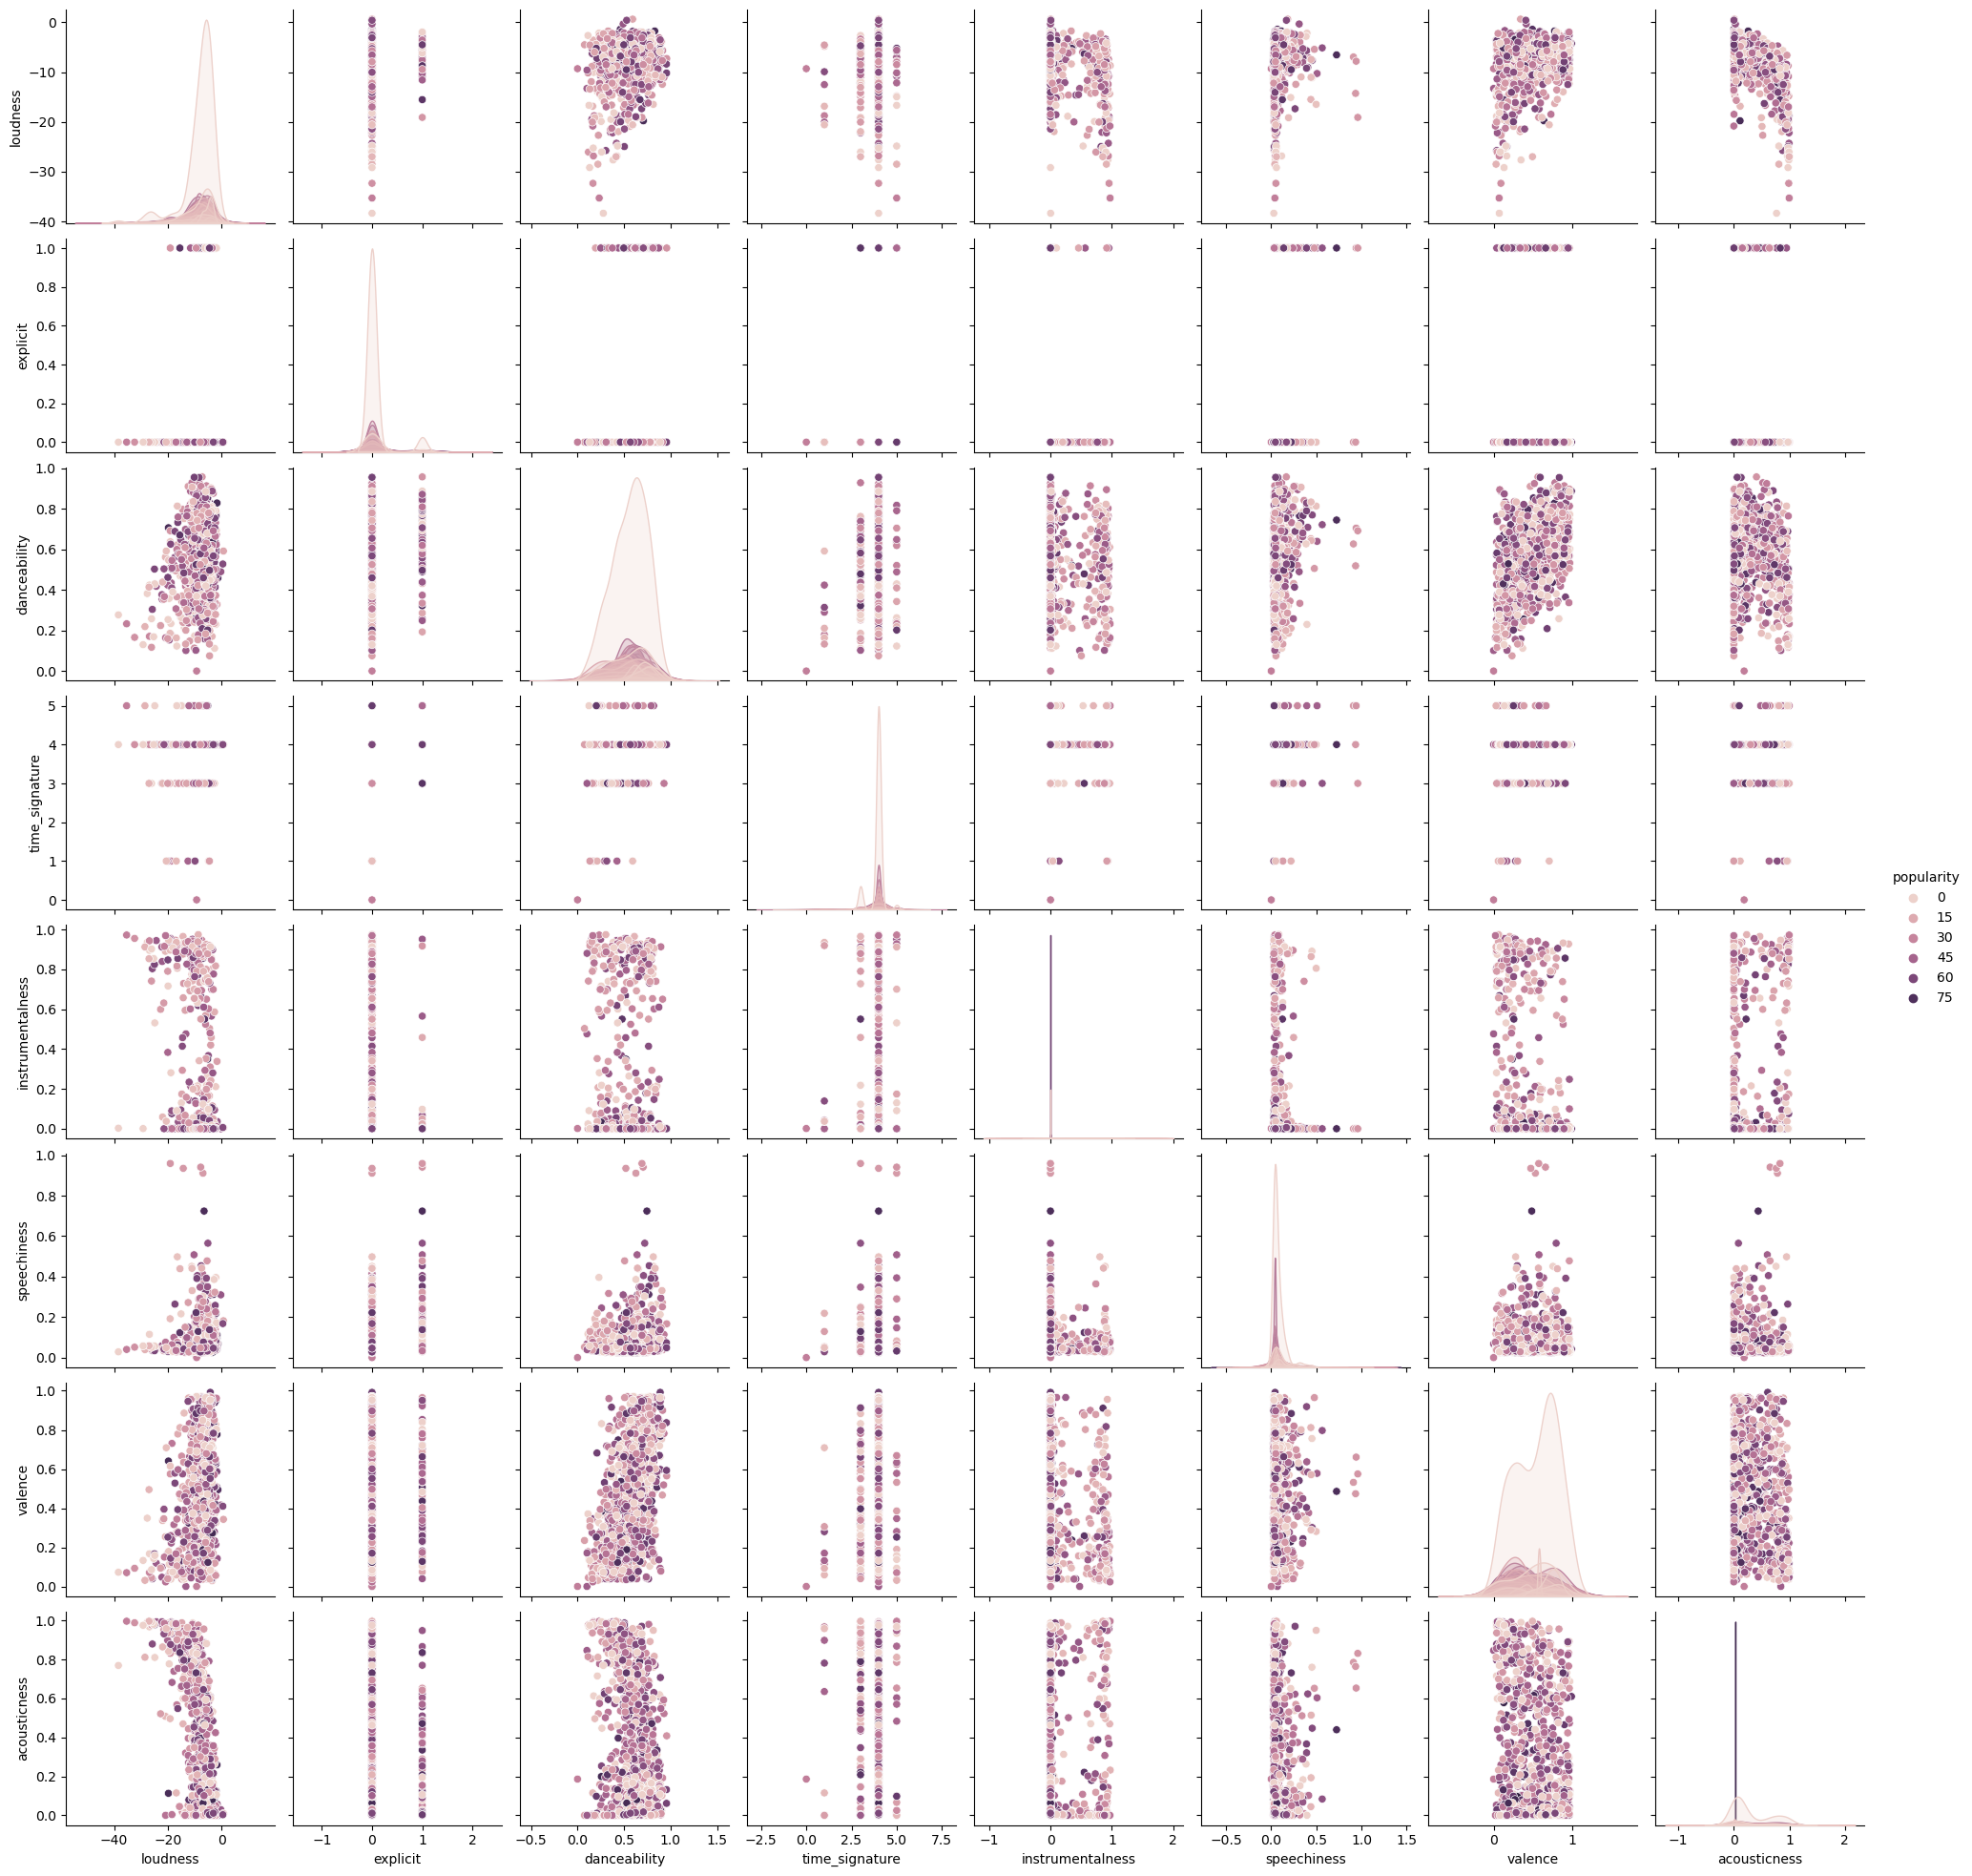

In [38]:
sampled_data_2 = num_cols.sample(n=1000, random_state=42)
sns.pairplot(sampled_data_2[scatter_features],hue='popularity')
plt.show()

In [66]:
training_features = scatter_features + list(genre_columns)

In [67]:
training_features

['loudness',
 'explicit',
 'danceability',
 'time_signature',
 'instrumentalness',
 'speechiness',
 'valence',
 'acousticness',
 'popularity',
 'track_genre_afrobeat',
 'track_genre_alt-rock',
 'track_genre_alternative',
 'track_genre_ambient',
 'track_genre_anime',
 'track_genre_black-metal',
 'track_genre_bluegrass',
 'track_genre_blues',
 'track_genre_brazil',
 'track_genre_breakbeat',
 'track_genre_british',
 'track_genre_cantopop',
 'track_genre_chicago-house',
 'track_genre_children',
 'track_genre_chill',
 'track_genre_classical',
 'track_genre_club',
 'track_genre_comedy',
 'track_genre_country',
 'track_genre_dance',
 'track_genre_dancehall',
 'track_genre_death-metal',
 'track_genre_deep-house',
 'track_genre_detroit-techno',
 'track_genre_disco',
 'track_genre_disney',
 'track_genre_drum-and-bass',
 'track_genre_dub',
 'track_genre_dubstep',
 'track_genre_edm',
 'track_genre_electro',
 'track_genre_electronic',
 'track_genre_emo',
 'track_genre_folk',
 'track_genre_forro',
 

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,ElasticNet,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score

In [122]:
# # dataset = dataset.drop(columns=['track_genre'],axis=1)
dataset = dataset.dropna()
X = dataset.iloc[:, 1:]
y = dataset.iloc[:,0]

In [123]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,shuffle=True)

In [124]:
# scatter_features.remove('popularity')
# scatter_features.remove('explicit')

In [125]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [130]:
models = {
    'Linear':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'ElasticNet':ElasticNet(),
    'Decision Tree':DecisionTreeRegressor(),
    'RandomForest':RandomForestRegressor(),
    'KNN':KNeighborsRegressor(n_neighbors=3)
}
evaluation_report = {}
def train_model(X_train,X_test,y_train,y_test):
    for i in models:
        print('Training',i)
        models[i].fit(X_train,y_train)
        preds = models[i].predict(X_test)
        r_score = r2_score(y_test,preds)
        mse = mean_squared_error(y_test,preds)
        print('R2_Score',r_score)
        print('MSE',mse)
        print('\n')
        print('------------------------------------------------')
        evaluation_report[i] = {'R2_Score':r_score,'MSE':mse}
    return evaluation_report

In [131]:
print(train_model(X_train,X_test,y_train,y_test))

Training Linear
R2_Score 0.25660704844328686
MSE 368.94881880204093


------------------------------------------------
Training Lasso
R2_Score 0.0018466785380383266
MSE 495.38738316733907


------------------------------------------------
Training Ridge
R2_Score 0.2565708829814699
MSE 368.9667678616746


------------------------------------------------
Training ElasticNet
R2_Score 0.0019421784756222804
MSE 495.3399861761603


------------------------------------------------
Training Decision Tree
R2_Score 0.07875051525351506
MSE 457.21970931718477


------------------------------------------------
Training RandomForest
R2_Score 0.5212783810315404
MSE 237.5914050349175


------------------------------------------------
Training KNN
R2_Score 0.09225870146585813
MSE 450.51554385964914


------------------------------------------------
{'Linear': {'R2_Score': 0.25660704844328686, 'MSE': 368.94881880204093}, 'Lasso': {'R2_Score': 0.0018466785380383266, 'MSE': 495.38738316733907}, 'Ridge': {